In [18]:
!jupyter nbconvert --to script IRRFile.ipynb

[NbConvertApp] Converting notebook IRRFile.ipynb to script
[NbConvertApp] Writing 30556 bytes to IRRFile.py


In [20]:
!pipreqs . --force

INFO: Not scanning for jupyter notebooks.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
INFO: Successfully saved requirements file in .\requirements.txt


In [1]:
import pandas as pd
import random

In [23]:
jp_gpt=pd.read_excel("C:\\D\\e Health Lab projects\\Question_Answering\\LLM_Causality\\Clinican results\\Raw results\\JP GPT-o1.xlsx")
jp_llama=pd.read_excel("C:\\D\\e Health Lab projects\\Question_Answering\\LLM_Causality\\Clinican results\\Raw results\\JP LLama 3.2 3B instruct Q8.xlsx")
kh_gpt=pd.read_excel("C:\\D\\e Health Lab projects\\Question_Answering\\LLM_Causality\\Clinican results\\Raw results\\KH GPT-o1.xlsx")
kh_llama=pd.read_excel("C:\\D\\e Health Lab projects\\Question_Answering\\LLM_Causality\\Clinican results\\Raw results\\KH LLama 3.2 3B instruct Q8.xlsx")
mj_gpt=pd.read_excel("C:\\D\\e Health Lab projects\\Question_Answering\\LLM_Causality\\Clinican results\\Raw results\\MJ GPT-o1.xlsx")
mj_llama=pd.read_excel("C:\\D\\e Health Lab projects\\Question_Answering\\LLM_Causality\\Clinican results\\Raw results\\MJ LLama 3.2 3B instruct Q8.xlsx")

In [24]:
jp_gpt.columns

Index(['Lab Test', 'Causal Type', 'Question', 'Causal factors', 'Response',
       'Reasoning', 'Accurate/Correct Response (Yes-No)',
       'Reliable Reasoning (1=high to 5=poor)'],
      dtype='object')

In [25]:
irr=pd.read_excel("C:\\D\\e Health Lab projects\\Question_Answering\\LLM_Causality\\Clinican results\\Raw results\\Causal IRR.xlsx")

In [26]:
irr.columns

Index(['LLM', 'Rung', 'Rater_1_Accurate_Correct_Response_Yes_No',
       'Rater_2_Accurate_Correct_Response_Yes_No',
       'Rater_3_Accurate_Correct_Response_Yes_No',
       'Rater_1_Reliable_Reasoning_1_high_to_5_poor',
       'Rater_2_Reliable_Reasoning_1_high_to_5_poor',
       'Rater_3_Reliable_Reasoning_1_high_to_5_poor'],
      dtype='object')

In [27]:
# Split irr into two: one for GPT and one for LLAMA
irr_gpt = irr[irr['LLM'] == 'GPT-o1'].copy()
irr_llama = irr[irr['LLM'] == 'Llama 3.2'].copy()

# Sanity check: Make sure lengths match before assigning
assert len(irr_gpt) == len(jp_gpt) == len(kh_gpt) == len(mj_gpt), "Mismatch in GPT dataframe lengths"
assert len(irr_llama) == len(jp_llama) == len(kh_llama) == len(mj_llama), "Mismatch in LLAMA dataframe lengths"

# Fill Rater 1 (JP)
irr_gpt['Rater_1_Accurate_Correct_Response_Yes_No'] = jp_gpt['Accurate/Correct Response (Yes-No)'].values
irr_gpt['Rater_1_Reliable_Reasoning_1_high_to_5_poor'] = jp_gpt['Reliable Reasoning (1=high to 5=poor)'].values
irr_llama['Rater_1_Accurate_Correct_Response_Yes_No'] = jp_llama['Accurate/Correct Response (Yes-No)'].values
irr_llama['Rater_1_Reliable_Reasoning_1_high_to_5_poor'] = jp_llama['Reliable Reasoning (1=high to 5=poor)'].values

# Fill Rater 2 (KH)
irr_gpt['Rater_2_Accurate_Correct_Response_Yes_No'] = kh_gpt['Accurate/Correct Response (Yes-No)'].values
irr_gpt['Rater_2_Reliable_Reasoning_1_high_to_5_poor'] = kh_gpt['Reliable Reasoning (1=high to 5=poor)'].values
irr_llama['Rater_2_Accurate_Correct_Response_Yes_No'] = kh_llama['Accurate/Correct Response (Yes-No)'].values
irr_llama['Rater_2_Reliable_Reasoning_1_high_to_5_poor'] = kh_llama['Reliable Reasoning (1=high to 5=poor)'].values

# Fill Rater 3 (MJ)
irr_gpt['Rater_3_Accurate_Correct_Response_Yes_No'] = mj_gpt['Accurate/Correct Response (Yes-No)'].values
irr_gpt['Rater_3_Reliable_Reasoning_1_high_to_5_poor'] = mj_gpt['Reliable Reasoning (1=high to 5=poor)'].values
irr_llama['Rater_3_Accurate_Correct_Response_Yes_No'] = mj_llama['Accurate/Correct Response (Yes-No)'].values
irr_llama['Rater_3_Reliable_Reasoning_1_high_to_5_poor'] = mj_llama['Reliable Reasoning (1=high to 5=poor)'].values

# Combine both back into one
irr_filled = pd.concat([irr_gpt, irr_llama], ignore_index=True)



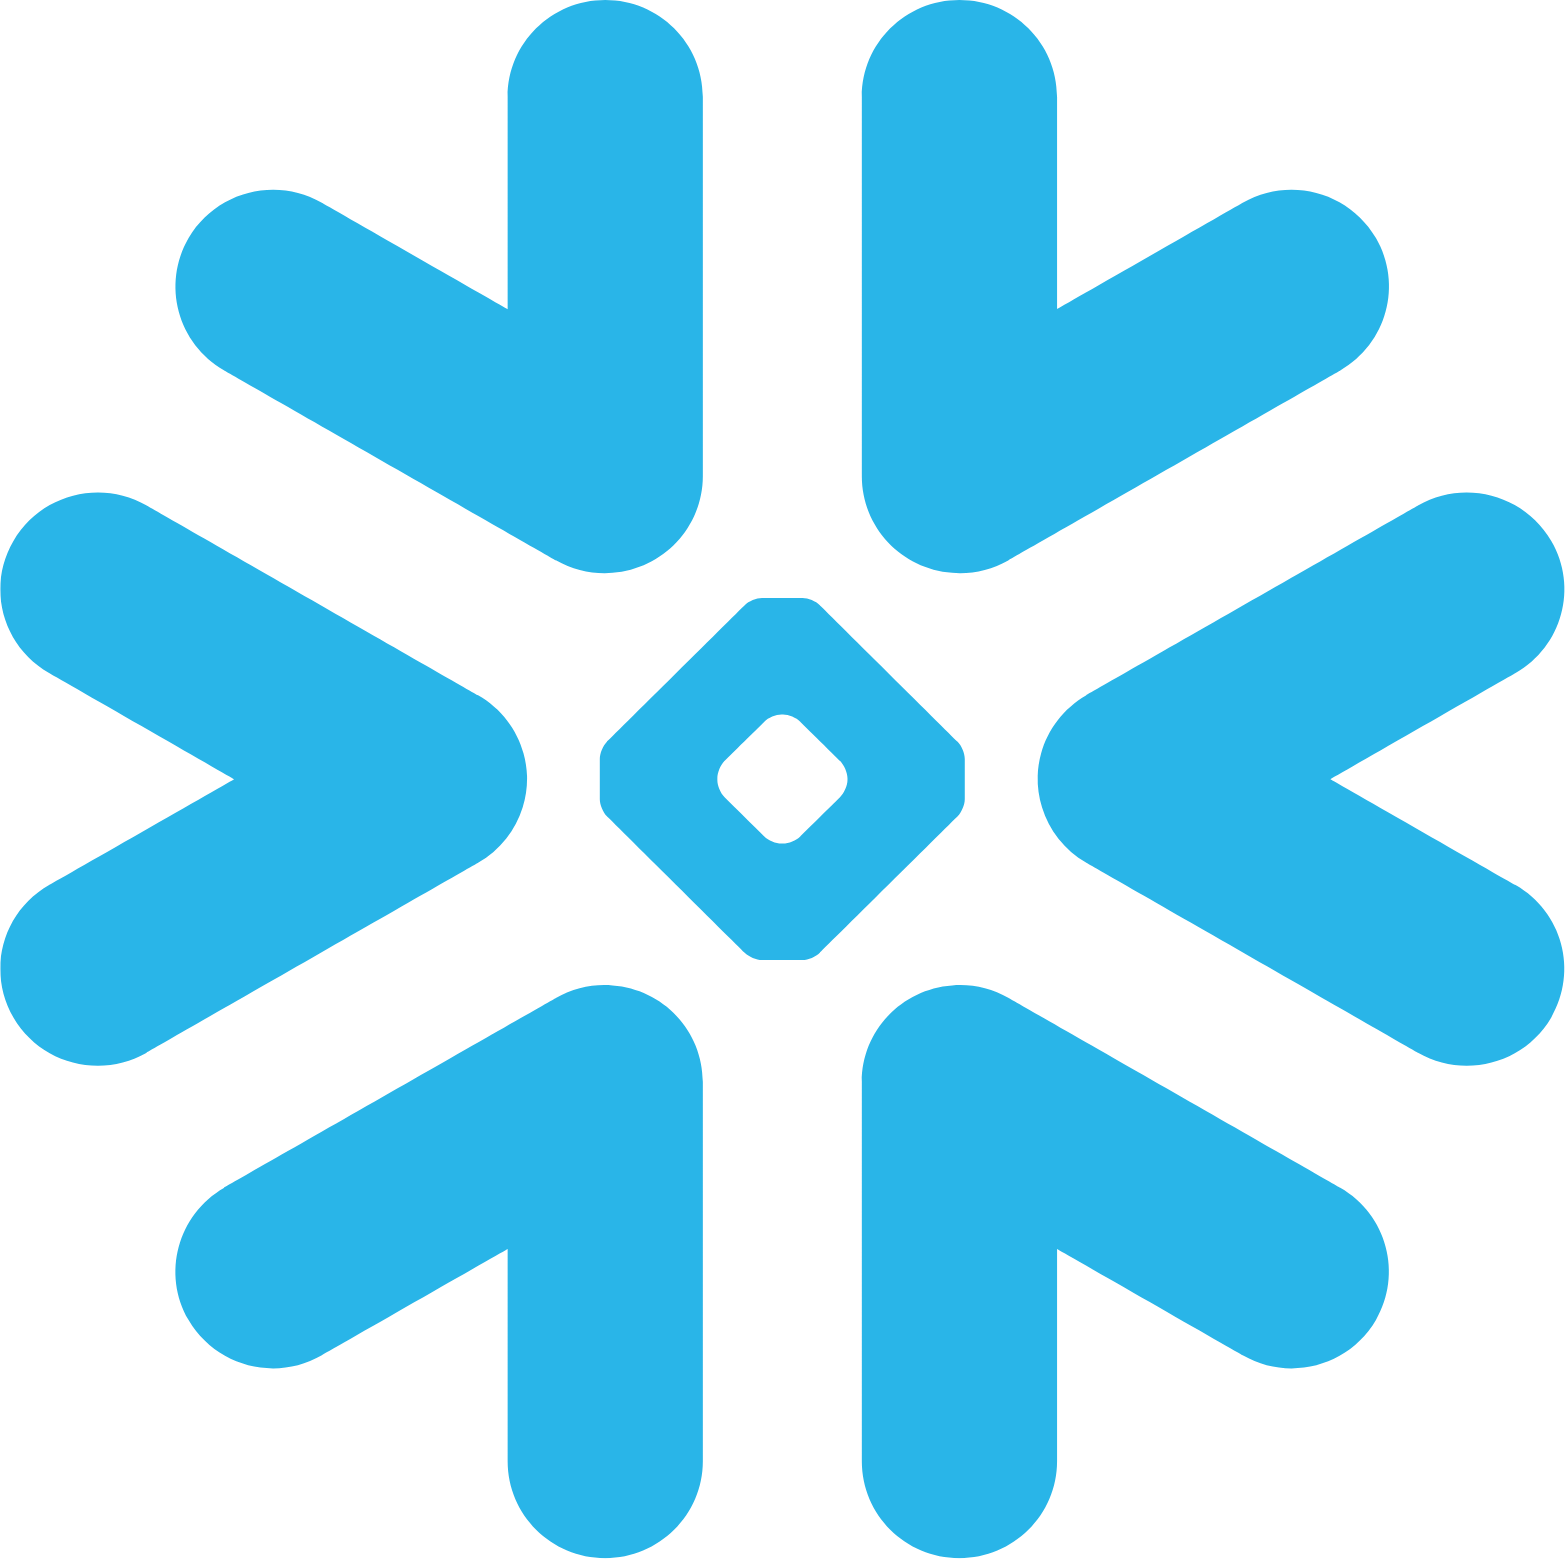

In [28]:
irr_filled

In [29]:
irr_filled.columns

Index(['LLM', 'Rung', 'Rater_1_Accurate_Correct_Response_Yes_No',
       'Rater_2_Accurate_Correct_Response_Yes_No',
       'Rater_3_Accurate_Correct_Response_Yes_No',
       'Rater_1_Reliable_Reasoning_1_high_to_5_poor',
       'Rater_2_Reliable_Reasoning_1_high_to_5_poor',
       'Rater_3_Reliable_Reasoning_1_high_to_5_poor'],
      dtype='object')

C:\Users\bb23u\AppData\Local\Temp\ipykernel_36820\4070186916.py:29: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`




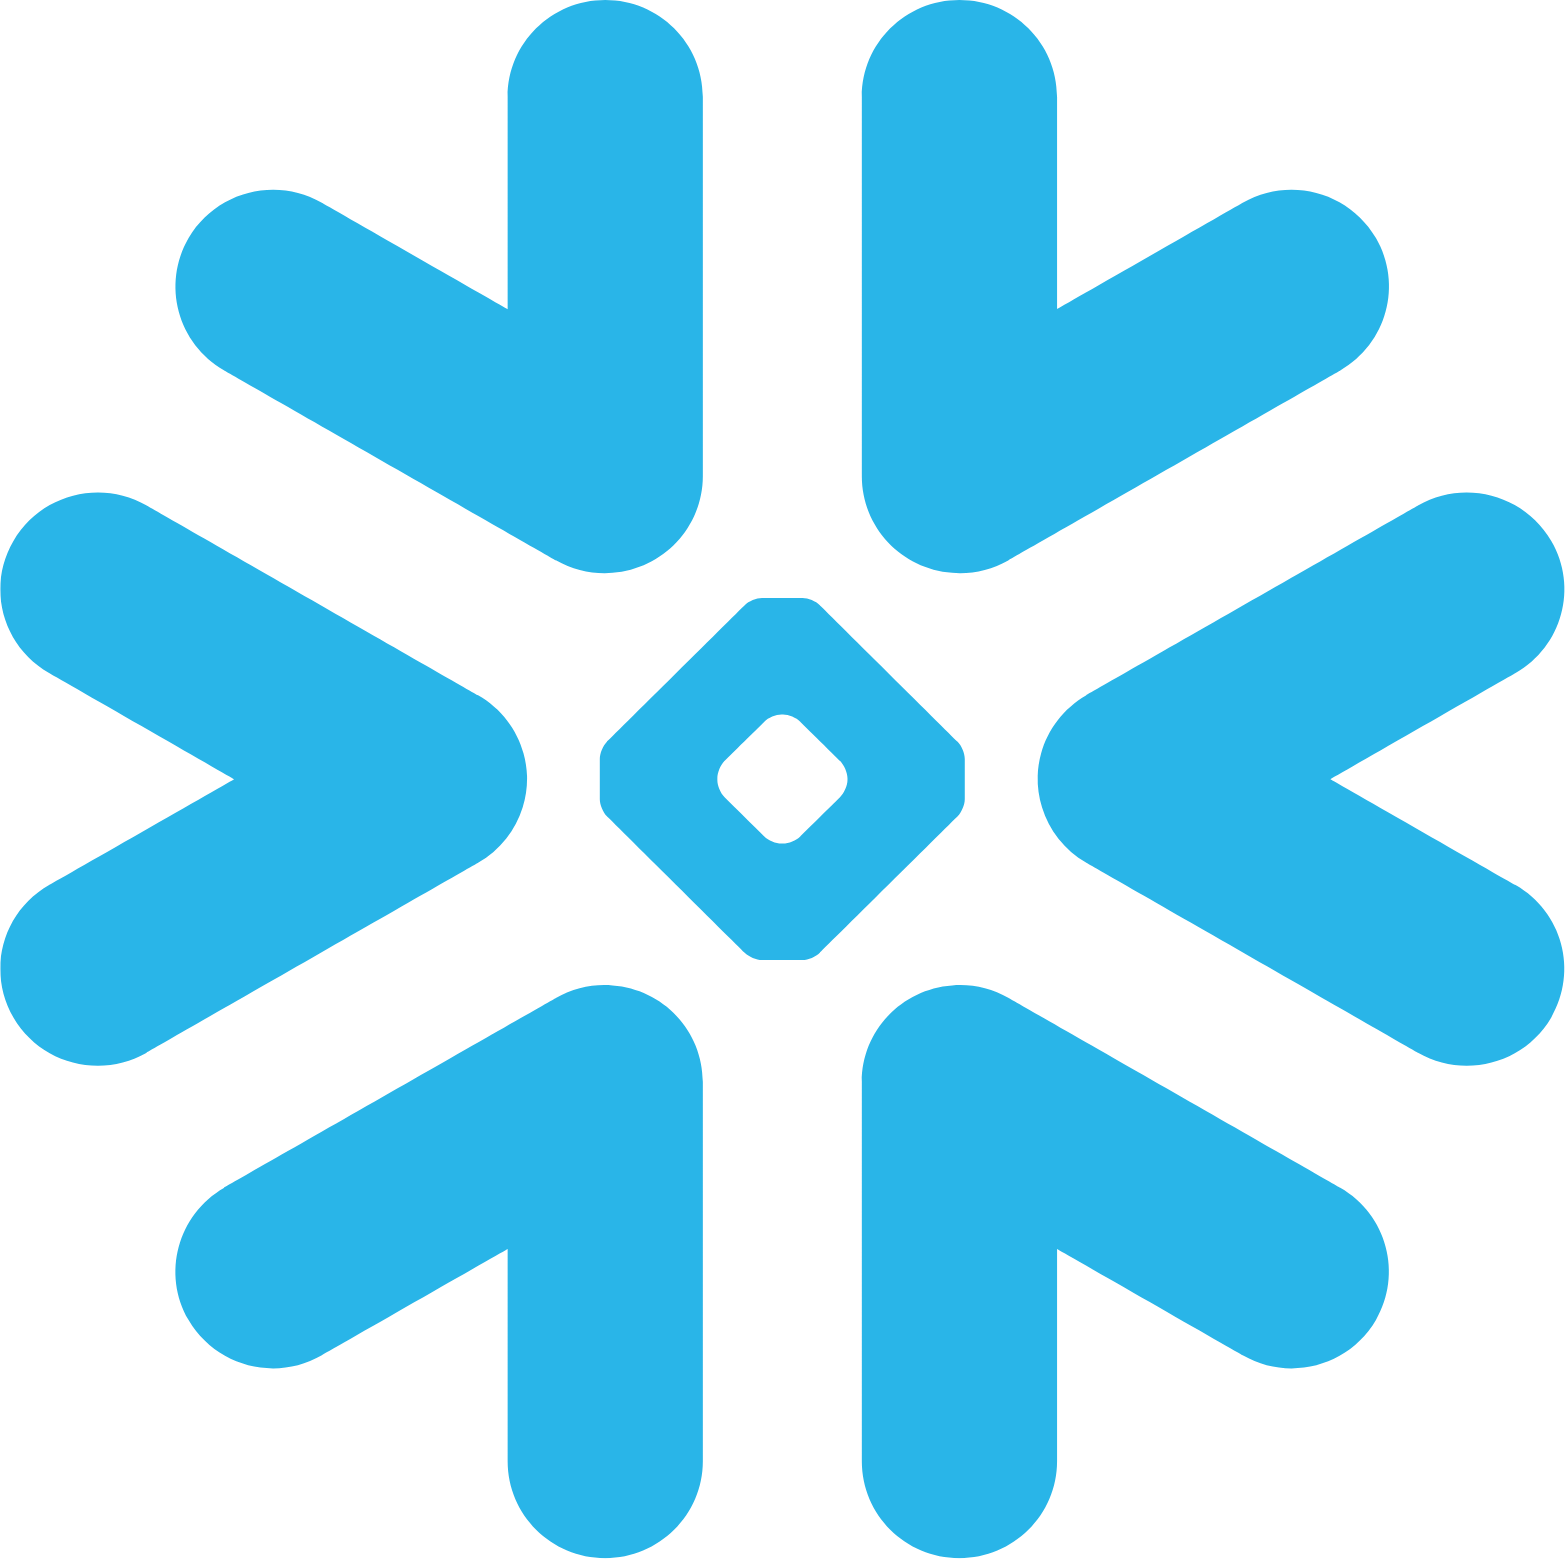

In [30]:
import numpy as np

# Columns for accurate/correct response
accuracy_cols = [
    'Rater_1_Accurate_Correct_Response_Yes_No',
    'Rater_2_Accurate_Correct_Response_Yes_No',
    'Rater_3_Accurate_Correct_Response_Yes_No'
]

# Standardize 'yes' to 'Yes' (case-insensitive)
for col in accuracy_cols:
    irr_filled[col] = irr_filled[col].replace(
        to_replace=r'^\s*yes\s*$', value='Yes', regex=True
    )
# Standardize 'yes' to 'Yes' (case-insensitive)
for col in accuracy_cols:
    irr_filled[col] = irr_filled[col].replace(
        to_replace=r'^\s*no\s*$', value='No', regex=True
    )
# Columns for reliable reasoning scores
reasoning_cols = [
    'Rater_1_Reliable_Reasoning_1_high_to_5_poor',
    'Rater_2_Reliable_Reasoning_1_high_to_5_poor',
    'Rater_3_Reliable_Reasoning_1_high_to_5_poor'
]

# Replace '?', empty strings, or whitespace-only strings with NaN
for col in reasoning_cols:
    irr_filled[col] = irr_filled[col].replace(
        to_replace=r'^\s*$|^\?$', value=np.nan, regex=True
    )
irr_filled

In [32]:
# Replace NaN with 'No' in accuracy columns
for col in accuracy_cols:
    irr_filled[col] = irr_filled[col].fillna('No')

# Replace NaN with '5' in reasoning columns
for col in reasoning_cols:
    irr_filled[col] = irr_filled[col].fillna('5')

irr_filled.to_excel("C:\\D\\e Health Lab projects\\Question_Answering\\LLM_Causality\\Clinican results\\Causal IRR_R3.xlsx")

In [2]:
df=pd.read_excel("C:\\D\\e Health Lab projects\\Question_Answering\\LLM_Causality\\Clinican results\\Causal IRR_R4.xlsx")
df

Lab Test               Causal Type  \
0           Hemoglobin A1c (HbA1c)               Association   
1           Hemoglobin A1c (HbA1c)              Intervention   
2           Hemoglobin A1c (HbA1c)  Counterfactual Reasoning   
3           Hemoglobin A1c (HbA1c)               Association   
4           Hemoglobin A1c (HbA1c)              Intervention   
..                             ...                       ...   
193       C-Reactive Protein (CRP)              Intervention   
194       C-Reactive Protein (CRP)  Counterfactual Reasoning   
195  Low-Density Lipoprotein (LDL)               Association   
196  Low-Density Lipoprotein (LDL)              Intervention   
197  Low-Density Lipoprotein (LDL)  Counterfactual Reasoning   

                                              Question Causal factors  \
0    Does a 68-year-old female a smoker with Hemogl...        smoking   
1    If a 61-year-old female patient with Hemoglobi...        smoking   
2    If this patient had never been a smoker, would...        smoking   
3    Does a 73-year-old male a smoker with Hemoglob...   age, smoking   
4    If a 63-year-old male patient with Hemoglobin ...   age, smoking   
..                                                 ...            ...   
193  If a 51-year-old male patient with C-Reactive ...        smoking   
194  If this patient had never been a smoker, would...        smoking   
195  Does a 53-year-old female a smoker with Low-De...        smoking   
196  If a 53-year-old male patient with Low-Density...        smoking   
197  If this patient had never been a smoker, would...        smoking   

            Response                                          Reasoning  \
0          Increased  Smoking is a well-established risk factor for ...   
1          Decreased  Smoking cessation can improve insulin sensitiv...   
2    Altered outcome  Smoking is a known risk factor for insulin res...   
3                 No  Age and smoking are risk factors for elevated ...   
4          Decreased  Quitting smoking is associated with improved i...   
..               ...                                                ...   
193         Decrease  Quitting smoking can lead to reduced inflammat...   
194               No  Smoking is a significant risk factor for incre...   
195              Yes  Smoking is associated with increased cardiovas...   
196         Decrease  Quitting smoking can lead to reduced cardiovas...   
197               No  Smoking is a significant risk factor for eleva...   

           LLM                      Rung  \
0       GPT-o1               Association   
1       GPT-o1              Intervention   
2       GPT-o1  Counterfactual Reasoning   
3       GPT-o1               Association   
4       GPT-o1              Intervention   
..         ...                       ...   
193  Llama 3.2              Intervention   
194  Llama 3.2  Counterfactual Reasoning   
195  Llama 3.2               Association   
196  Llama 3.2              Intervention   
197  Llama 3.2  Counterfactual Reasoning   

    Rater_1_Accurate_Correct_Response_Yes_No  \
0                                         No   
1                                        Yes   
2                                        Yes   
3                                         No   
4                                        Yes   
..                                       ...   
193                                      Yes   
194                                      Yes   
195                                       No   
196                                      Yes   
197                                      Yes   

    Rater_2_Accurate_Correct_Response_Yes_No  \
0                                         No   
1                                        Yes   
2                                        Yes   
3                                         No   
4                                        Yes   
..                                       ...   
193                                  

In [3]:
# Assume df is your DataFrame
null_counts = df.isnull().sum()

print(null_counts)

Lab Test                                       0
Causal Type                                    0
Question                                       0
Causal factors                                 0
Response                                       0
Reasoning                                      0
LLM                                            0
Rung                                           0
Rater_1_Accurate_Correct_Response_Yes_No       0
Rater_2_Accurate_Correct_Response_Yes_No       0
Rater_3_Accurate_Correct_Response_Yes_No       0
Rater_4_Accurate_Correct_Response_Yes_No       0
Rater_1_Reliable_Reasoning_1_high_to_5_poor    0
Rater_2_Reliable_Reasoning_1_high_to_5_poor    0
Rater_3_Reliable_Reasoning_1_high_to_5_poor    0
Rater_4_Reliable_Reasoning_1_high_to_5_poor    0
dtype: int64


In [4]:
import numpy as np
from sklearn.metrics import accuracy_score
from statsmodels.stats.inter_rater import fleiss_kappa
import matplotlib.pyplot as plt
import seaborn as sns

# Convert Yes/No responses to binary (Yes=1, No=0)
accuracy_cols = [
    'Rater_1_Accurate_Correct_Response_Yes_No',
    'Rater_2_Accurate_Correct_Response_Yes_No',
    'Rater_3_Accurate_Correct_Response_Yes_No',
    'Rater_4_Accurate_Correct_Response_Yes_No'
]
df[accuracy_cols] = df[accuracy_cols].applymap(lambda x: 1 if x == 'Yes' else 0)

# Calculate majority vote for accuracy
df['GT_Accuracy'] = df[accuracy_cols].mode(axis=1)[0]

# Calculate median for reliability
reliability_cols = [
    'Rater_1_Reliable_Reasoning_1_high_to_5_poor',
    'Rater_2_Reliable_Reasoning_1_high_to_5_poor',
    'Rater_3_Reliable_Reasoning_1_high_to_5_poor',
    'Rater_4_Reliable_Reasoning_1_high_to_5_poor'
]
df['GT_Reliability'] = df[reliability_cols].median(axis=1)

# Group by LLM and Rung to evaluate accuracy and reliability
grouped = df.groupby(['LLM', 'Rung']).agg(
    Accuracy_Performance=('GT_Accuracy', 'mean'),
    Reliability_Performance=('GT_Reliability', 'median')
).reset_index()

# Inter-rater agreement (Fleiss' Kappa) — only for positive class (Yes)
accuracy_matrix = df[accuracy_cols].T.values
counts = np.apply_along_axis(lambda x: [sum(x == 1), sum(x == 0)], axis=0, arr=accuracy_matrix.T)
# Adjust Fleiss' input: create a matrix of counts per label per item (Yes=1 only)
# Fleiss expects: rows = items, cols = categories (Yes/No), values = #raters per category per item

# Create the rating matrix: for each item, count how many raters said Yes (1) and No (0)
fleiss_data = np.apply_along_axis(
    lambda x: [np.sum(x == 1), np.sum(x == 0)],
    axis=1,
    arr=df[accuracy_cols].values
)

# Compute Fleiss' Kappa
fleiss_positive_kappa = fleiss_kappa(fleiss_data, method='fleiss')
fleiss_positive_kappa


C:\Users\bb23u\AppData\Local\Temp\ipykernel_30896\2891410768.py:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[accuracy_cols] = df[accuracy_cols].applymap(lambda x: 1 if x == 'Yes' else 0)


0.13045888184192295

In [5]:
from statsmodels.stats.inter_rater import fleiss_kappa

# Prepare matrix for Fleiss' Kappa: count how many raters voted No (0) and Yes (1)
ratings_matrix = df[accuracy_cols].apply(lambda row: [sum(row == 0), sum(row == 1)], axis=1, result_type='expand')
ratings_matrix.columns = ["No", "Yes"]

# Keep only rows where at least one "Yes" vote exists (focus on positive class)
positive_class_matrix = ratings_matrix[ratings_matrix["Yes"] > 0]

# Compute Fleiss' Kappa on this subset
fleiss_kappa_positive = fleiss_kappa(positive_class_matrix.values)

fleiss_kappa_positive


0.13045888184192295

In [6]:
# Group by LLM and Rung to evaluate accuracy and reliability
grouped

LLM                      Rung  Accuracy_Performance  \
0     GPT-o1               Association              0.757576   
1     GPT-o1  Counterfactual Reasoning              0.939394   
2     GPT-o1              Intervention              0.909091   
3  Llama 3.2               Association              0.606061   
4  Llama 3.2  Counterfactual Reasoning              0.696970   
5  Llama 3.2              Intervention              0.909091   

   Reliability_Performance  
0                      2.0  
1                      1.5  
2                      1.5  
3                      2.0  
4                      1.5  
5                      1.5

In [7]:
# Prepare table summarizing aggregate ground truth description
agg_gt_description = pd.DataFrame({
    "Metric": ["Accuracy", "Reliability"],
    "Ground Truth Computation": [
        "Calculated by majority vote across 4 raters (Yes/No)",
        "Computed as median of Likert-scale scores (1 = high reliability, 5 = poor)"
    ]
})
agg_gt_description

Metric                           Ground Truth Computation
0     Accuracy  Calculated by majority vote across 4 raters (Y...
1  Reliability  Computed as median of Likert-scale scores (1 =...

C:\Users\bb23u\AppData\Local\Temp\ipykernel_8484\1351070700.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[accuracy_cols] = df[accuracy_cols].applymap(


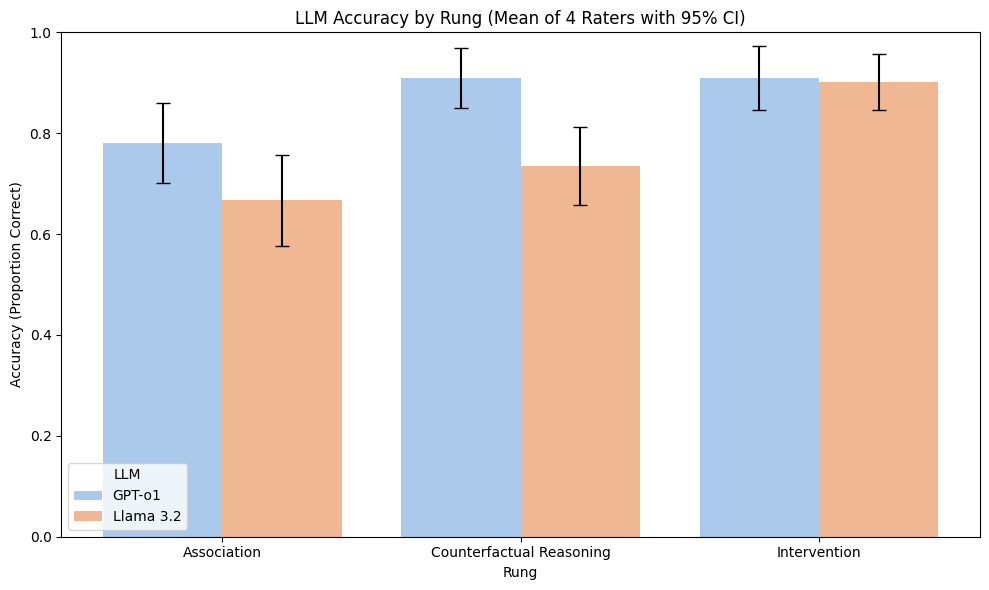

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import sem
df=pd.read_excel("C:\\D\\e Health Lab projects\\Question_Answering\\LLM_Causality\\Clinican results\\Causal IRR_R4.xlsx")
# Identify accuracy columns
accuracy_cols = [col for col in df.columns if 'Accurate_Correct_Response' in col]

# Robust conversion: convert all values to string, then strip + lower + map
df[accuracy_cols] = df[accuracy_cols].applymap(
    lambda x: 1 if str(x).strip().lower() == 'yes' else 0
)

# Compute GT_Accuracy and group stats
df['GT_Accuracy'] = df[accuracy_cols].mean(axis=1)
summary = df.groupby(['LLM', 'Rung']).agg(
    Accuracy=('GT_Accuracy', 'mean'),
    Accuracy_SE=('GT_Accuracy', sem)
).reset_index()
summary['Accuracy_CI'] = 1.96 * summary['Accuracy_SE']

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=summary, x='Rung', y='Accuracy', hue='LLM', palette='pastel', errorbar=None)

# Add 95% CI error bars
for bar, (_, row) in zip(ax.patches, summary.iterrows()):
    x = bar.get_x() + bar.get_width() / 2
    ax.errorbar(x=x, y=row['Accuracy'], yerr=row['Accuracy_CI'], fmt='none', c='black', capsize=5)

plt.title('LLM Accuracy by Rung (Mean of 4 Raters with 95% CI)')
plt.ylabel('Accuracy (Proportion Correct)')
plt.xlabel('Rung')
plt.ylim(0, 1)
plt.legend(title='LLM')
plt.tight_layout()
plt.show()




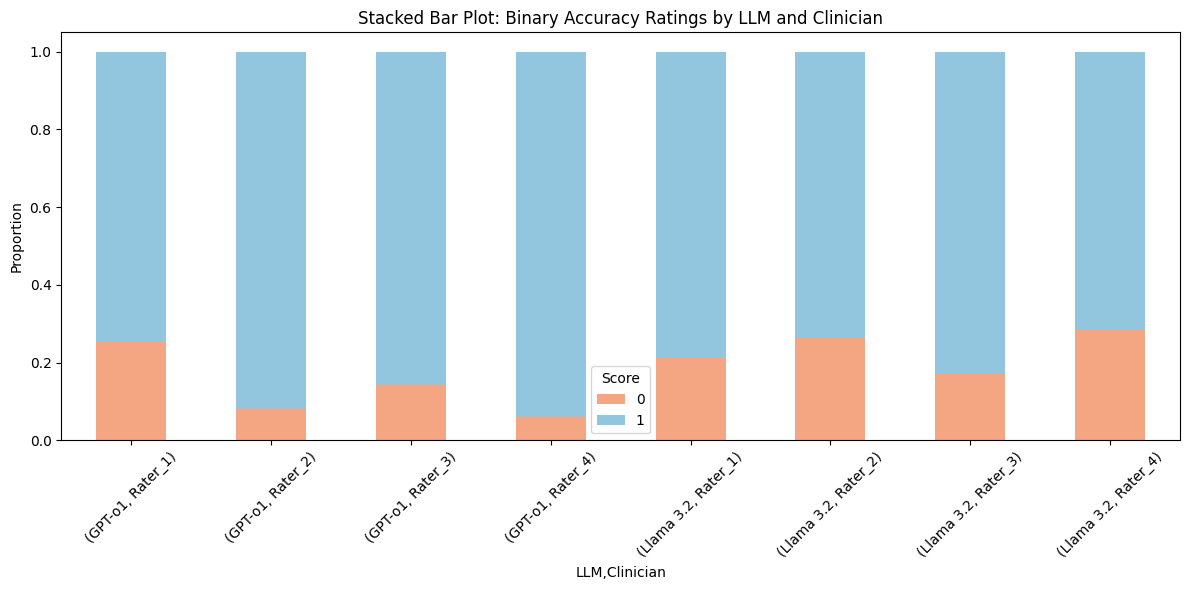

In [5]:
# Reshape binary data
binary_long = df.melt(
    id_vars=['LLM', 'Rung'],
    value_vars=[col for col in df.columns if 'Accurate_Correct_Response' in col],
    var_name='Clinician',
    value_name='Score'
)
binary_long['Clinician'] = binary_long['Clinician'].str.extract(r'(Rater_\d)')

# Group and normalize
binary_counts = binary_long.groupby(['LLM', 'Clinician', 'Score']).size().reset_index(name='Count')
binary_totals = binary_counts.groupby(['LLM', 'Clinician'])['Count'].transform('sum')
binary_counts['Proportion'] = binary_counts['Count'] / binary_totals

# Pivot for plotting
binary_pivot = binary_counts.pivot_table(index=['LLM', 'Clinician'], columns='Score', values='Proportion').fillna(0)

# Plot
ax = binary_pivot.plot(kind='bar', stacked=True, figsize=(12, 6), color=['#F4A582', '#92C5DE'])
ax.set_ylabel('Proportion')
ax.set_title('Stacked Bar Plot: Binary Accuracy Ratings by LLM and Clinician')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


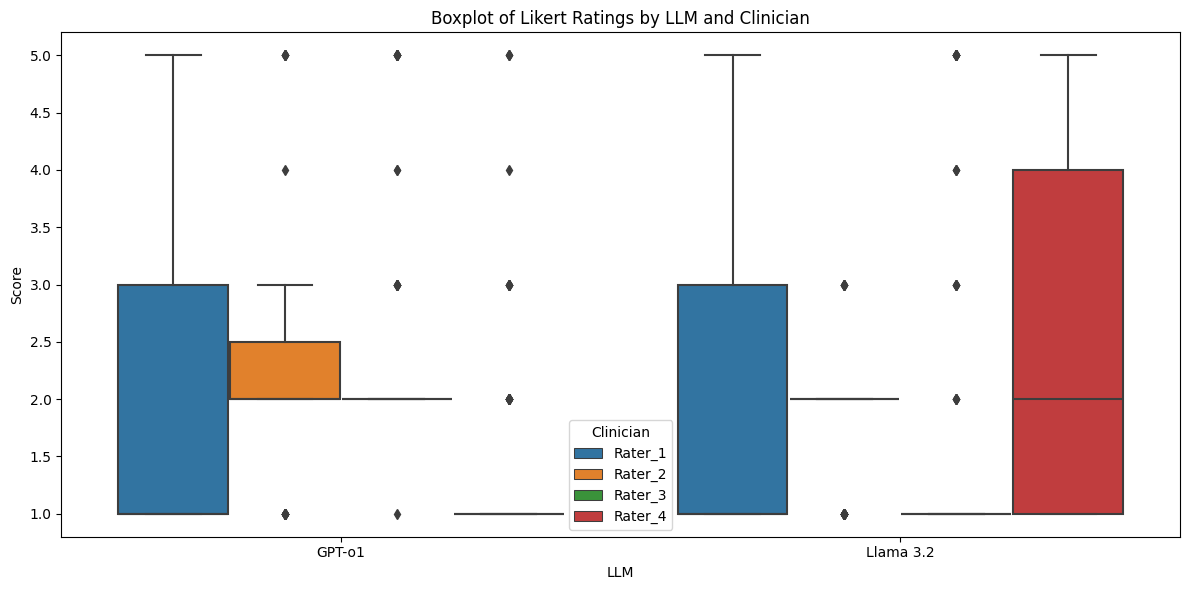

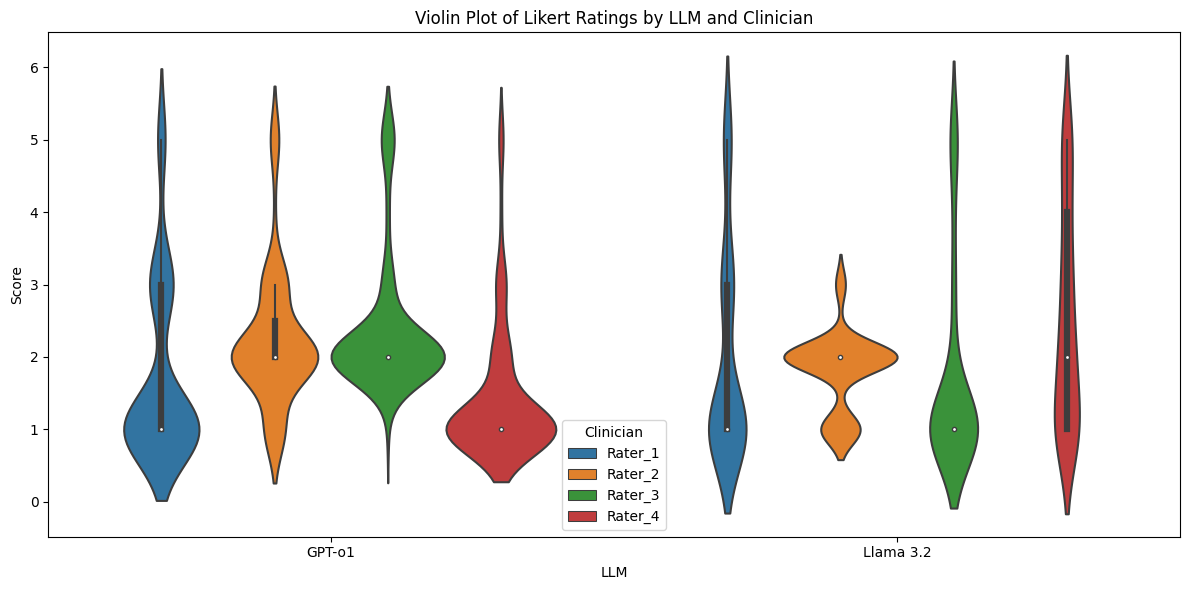

In [6]:
import seaborn as sns

# Reshape Likert data
likert_long = df.melt(
    id_vars=['LLM', 'Rung'],
    value_vars=[col for col in df.columns if 'Reliable_Reasoning' in col],
    var_name='Clinician',
    value_name='Score'
)
likert_long['Clinician'] = likert_long['Clinician'].str.extract(r'(Rater_\d)')

# Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=likert_long, x='LLM', y='Score', hue='Clinician')
plt.title('Boxplot of Likert Ratings by LLM and Clinician')
plt.tight_layout()
plt.show()

# Violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(data=likert_long, x='LLM', y='Score', hue='Clinician')
plt.title('Violin Plot of Likert Ratings by LLM and Clinician')
plt.tight_layout()
plt.show()


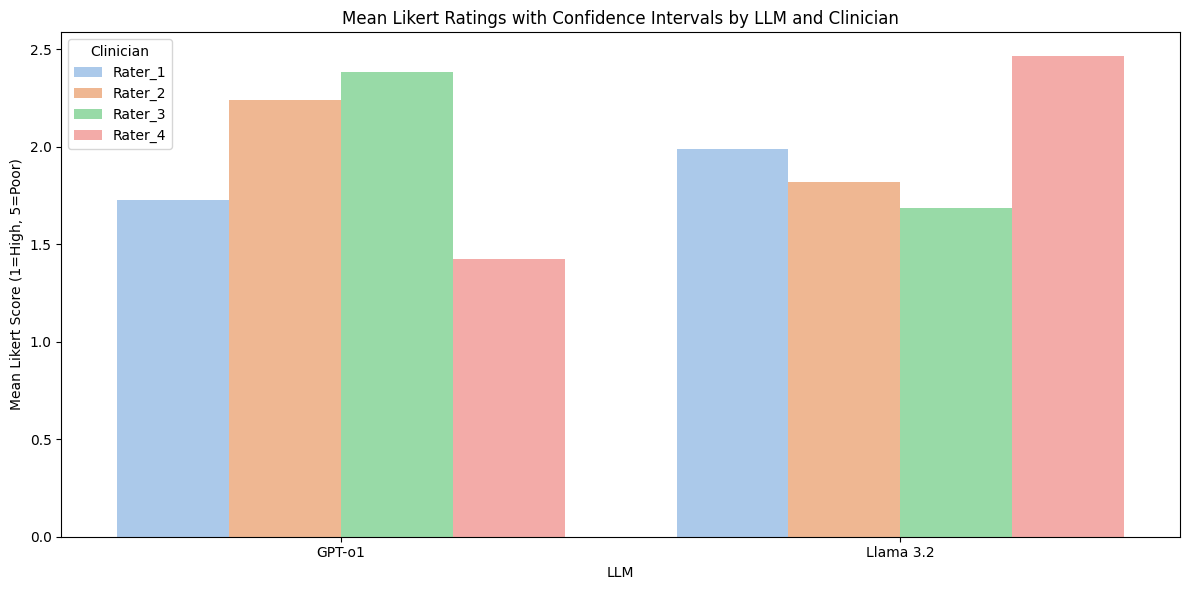

In [12]:
from scipy.stats import sem

# Summary stats
likert_summary = likert_long.groupby(['LLM', 'Clinician']).agg(
    mean_score=('Score', 'mean'),
    se=('Score', sem)
).reset_index()

# Bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=likert_summary, x='LLM', y='mean_score', hue='Clinician',
            palette='pastel', capsize=0.1, errwidth=1)
plt.ylabel('Mean Likert Score (1=High, 5=Poor)')
plt.title('Mean Likert Ratings with Confidence Intervals by LLM and Clinician')
plt.tight_layout()
plt.show()


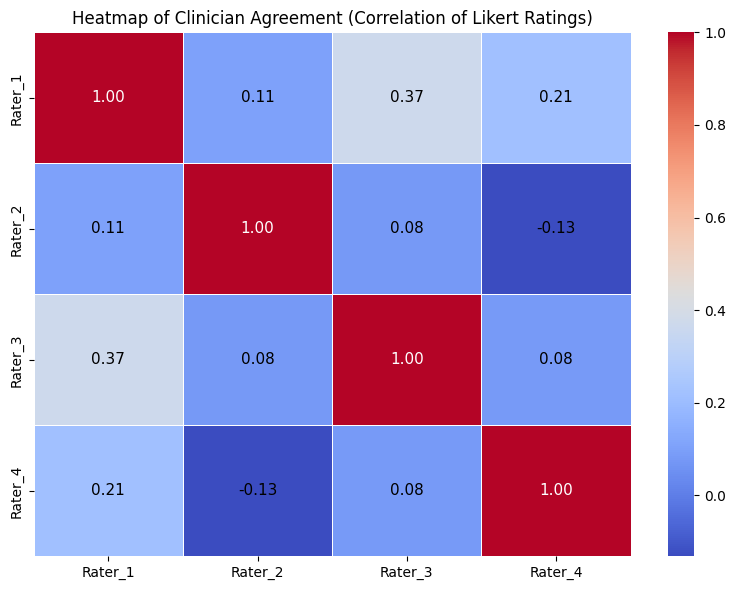

In [9]:
import numpy as np

# Recompute correlation matrix after cleaning
likert_cols = [col for col in df.columns if 'Reliable_Reasoning' in col]
likert_matrix = df[likert_cols].apply(pd.to_numeric, errors='coerce')
likert_matrix.columns = ['Rater_1', 'Rater_2', 'Rater_3', 'Rater_4']
likert_matrix_clean = likert_matrix.dropna()
corr_matrix = likert_matrix_clean.corr()

# Use provided plotting reference to draw heatmap with annotation contrast
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
norm = plt.Normalize(vmin=np.nanmin(corr_matrix.values), vmax=np.nanmax(corr_matrix.values))
sns.heatmap(corr_matrix, cmap='coolwarm', cbar=True, ax=ax, annot=False, fmt=".2f", linewidths=0.5)
ax.set_title('Heatmap of Clinician Agreement (Correlation of Likert Ratings)')

for y in range(corr_matrix.shape[0]):
    for x in range(corr_matrix.shape[1]):
        val = corr_matrix.iloc[y, x]
        if not np.isnan(val):
            color = "white" if norm(val) > 0.5 else "black"
            ax.text(x + 0.5, y + 0.5, f"{val:.2f}",
                    ha='center', va='center', color=color, fontsize=11)

ax.set_ylabel("")
ax.set_xlabel("")
plt.tight_layout()
plt.savefig("C:\\D\\e Health Lab projects\\Question_Answering\\LLM_Causality\\Clinican results\\Heatmap of Clinician Agreement.png", dpi=300)
plt.show()



In [14]:
import numpy as np
df=pd.read_excel("C:\\D\\e Health Lab projects\\Question_Answering\\LLM_Causality\\Clinican results\\Causal IRR_R4.xlsx")

# Convert Yes/No to binary 1/0 for accuracy ratings
accuracy_cols = [col for col in df.columns if "Accurate_Correct_Response" in col]
df[accuracy_cols] = df[accuracy_cols].applymap(lambda x: 1 if str(x).strip().lower() == "yes" else 0)

# Create aggregate ground truth: majority vote for accuracy, median for reliability
df["GT_Accuracy"] = df[accuracy_cols].mean(axis=1).apply(lambda x: 1 if x >= 0.5 else 0)

reliability_cols = [col for col in df.columns if "Reliable_Reasoning" in col]
df["GT_Reliability"] = df[reliability_cols].median(axis=1)

# Prepare performance metrics stratified by LLM and Rung
performance_summary = df.groupby(["LLM", "Rung"]).agg(
    Accuracy_Percent=("GT_Accuracy", lambda x: round(100 * x.mean(), 1)),
    Median_Reliability=("GT_Reliability", "median")
).reset_index()

performance_summary


C:\Users\bb23u\AppData\Local\Temp\ipykernel_30896\2804567839.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[accuracy_cols] = df[accuracy_cols].applymap(lambda x: 1 if str(x).strip().lower() == "yes" else 0)


LLM                      Rung  Accuracy_Percent  Median_Reliability
0     GPT-o1               Association              93.9                 2.0
1     GPT-o1  Counterfactual Reasoning              97.0                 1.5
2     GPT-o1              Intervention              97.0                 1.5
3  Llama 3.2               Association              81.8                 2.0
4  Llama 3.2  Counterfactual Reasoning              93.9                 1.5
5  Llama 3.2              Intervention             100.0                 1.5

C:\Users\bb23u\AppData\Local\Temp\ipykernel_8484\937737323.py:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[accuracy_cols] = df[accuracy_cols].applymap(


         LLM                      Rung  Median  CI_Lower  CI_Upper  CI_Width
0     GPT-o1               Association    0.75      0.75      1.00      0.25
1     GPT-o1  Counterfactual Reasoning    1.00      1.00      1.00      0.00
2     GPT-o1              Intervention    1.00      1.00      1.00      0.00
3  Llama 3.2               Association    0.75      0.50      0.75      0.25
4  Llama 3.2  Counterfactual Reasoning    0.75      0.75      0.75      0.00
5  Llama 3.2              Intervention    1.00      1.00      1.00      0.00


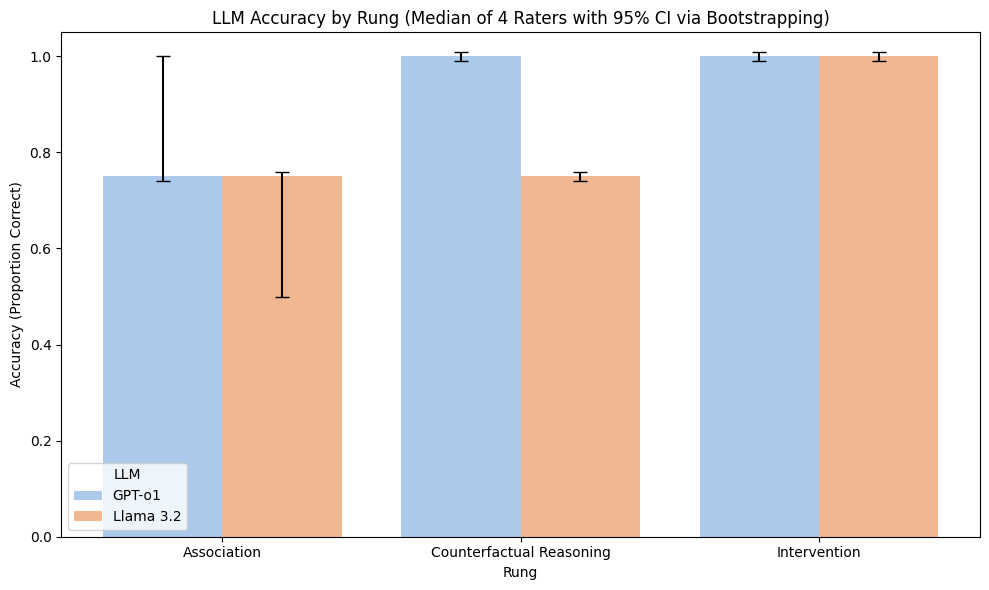

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load your file
df = pd.read_excel("C:\\D\\e Health Lab projects\\Question_Answering\\LLM_Causality\\Clinican results\\Causal IRR_R4.xlsx")

# Identify accuracy columns
accuracy_cols = [col for col in df.columns if 'Accurate_Correct_Response' in col]

# Convert Yes/No to binary
df[accuracy_cols] = df[accuracy_cols].applymap(
    lambda x: 1 if str(x).strip().lower() == 'yes' else 0
)

# Ground truth accuracy: majority vote
df['GT_Accuracy'] = df[accuracy_cols].mean(axis=1)

# Bootstrapping function to calculate median CI
def bootstrap_median_ci(series, n_boot=1000, ci=95):
    medians = [np.median(series.sample(frac=1, replace=True)) for _ in range(n_boot)]
    lower = np.percentile(medians, (100 - ci) / 2)
    upper = np.percentile(medians, 100 - (100 - ci) / 2)
    return np.median(series), lower, upper

# Grouped stats
grouped = df.groupby(['LLM', 'Rung'])['GT_Accuracy'].apply(
    lambda x: pd.Series(bootstrap_median_ci(x))
).unstack()
grouped.columns = ['Median', 'CI_Lower', 'CI_Upper']
grouped = grouped.reset_index()

# Calculate asymmetric error bars
grouped['CI_Lower_Err'] = grouped['Median'] - grouped['CI_Lower']
grouped['CI_Upper_Err'] = grouped['CI_Upper'] - grouped['Median']
grouped['CI_Width'] = grouped['CI_Upper'] - grouped['CI_Lower']

# Display the CI values for validation
print(grouped[['LLM', 'Rung', 'Median', 'CI_Lower', 'CI_Upper', 'CI_Width']])

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=grouped, x='Rung', y='Median', hue='LLM', palette='pastel', errorbar=None)

# Add 95% CI error bars manually (with visual minimum for tiny bars)
for bar, (_, row) in zip(ax.patches, grouped.iterrows()):
    x = bar.get_x() + bar.get_width() / 2
    lower_err = max(0.01, row['CI_Lower_Err'])  # Ensure visible
    upper_err = max(0.01, row['CI_Upper_Err'])  # Ensure visible
    ax.errorbar(x=x, y=row['Median'], yerr=[[lower_err], [upper_err]],
                fmt='none', c='black', capsize=5)

plt.title('LLM Accuracy by Rung (Median of 4 Raters with 95% CI via Bootstrapping)')
plt.ylabel('Accuracy (Proportion Correct)')
plt.xlabel('Rung')
plt.ylim(0, 1.05)
plt.legend(title='LLM')
plt.tight_layout()
plt.savefig("C:\\D\\e Health Lab projects\\Question_Answering\\LLM_Causality\\Clinican results\\LLM Accuracy by Rung (Median of 4 Raters with 95% CI via Bootstrapping).png", dpi=300)
plt.show()





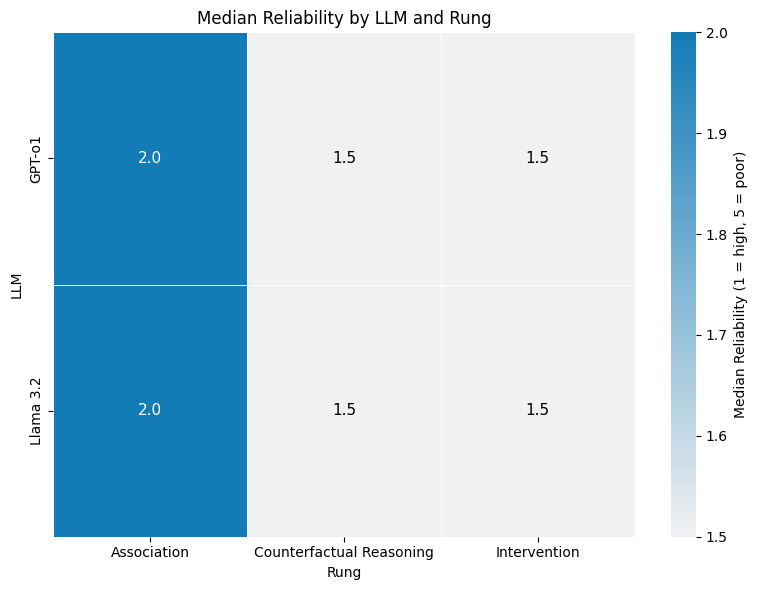

In [11]:
# Recalculate performance_by_rung: Accuracy % and Median Reliability grouped by LLM and Rung

# Compute median reliability per row
reliability_cols = [col for col in df.columns if "Reliable_Reasoning" in col]
df["GT_Reliability"] = df[reliability_cols].median(axis=1)

# Group by LLM and Rung
performance_by_rung = df.groupby(["LLM", "Rung"]).agg(
    Accuracy_Percent=("GT_Accuracy", lambda x: round(100 * x.mean(), 1)),
    Median_Reliability=("GT_Reliability", "median")
).reset_index()

# Use the filled pivot table again for all LLM x Rung combinations
llm_list = performance_by_rung['LLM'].unique()
rung_list = performance_by_rung['Rung'].unique()
full_grid = pd.MultiIndex.from_product([llm_list, rung_list], names=['LLM', 'Rung']).to_frame(index=False)

# Merge to ensure all combinations are represented
pivot_filled = pd.merge(full_grid, performance_by_rung, on=['LLM', 'Rung'], how='left')
heatmap_data = pivot_filled.pivot(index="LLM", columns="Rung", values="Median_Reliability")

# Plot heatmap again with an explicit label (1 = high, 5 = poor) on colorbar

fig, ax = plt.subplots(figsize=(8, 6))
title = "Median Reliability by LLM and Rung"
cmap = sns.light_palette("#137BB6", as_cmap=True)

# Create full LLM x Rung grid again to ensure all cells show
llm_list = performance_by_rung['LLM'].unique()
rung_list = performance_by_rung['Rung'].unique()
full_grid = pd.MultiIndex.from_product([llm_list, rung_list], names=['LLM', 'Rung']).to_frame(index=False)

# Merge and pivot
pivot_filled = pd.merge(full_grid, performance_by_rung, on=['LLM', 'Rung'], how='left')
heatmap_data = pivot_filled.pivot(index="LLM", columns="Rung", values="Median_Reliability")

# Normalize for color
norm = plt.Normalize(vmin=np.nanmin(heatmap_data.values), vmax=np.nanmax(heatmap_data.values))

# Plot base heatmap
heatmap = sns.heatmap(
    heatmap_data, cmap=cmap, cbar=True, ax=ax, annot=False, fmt=".2f", linewidths=0.5,
    cbar_kws={"label": "Median Reliability (1 = high, 5 = poor)"}
)

# Annotate each cell manually
for y in range(heatmap_data.shape[0]):
    for x in range(heatmap_data.shape[1]):
        val = heatmap_data.iloc[y, x]
        if not np.isnan(val):
            color = "white" if norm(val) > 0.5 else "black"
            ax.text(x + 0.5, y + 0.5, f"{val:.1f}",
                    ha='center', va='center', color=color, fontsize=11)

ax.set_title(title)
ax.set_ylabel("LLM")
ax.set_xlabel("Rung")
plt.tight_layout()
plt.savefig("C:\\D\\e Health Lab projects\\Question_Answering\\LLM_Causality\\Clinican results\\Median Reliability by LLM and Rung.png", dpi=300)
plt.show()





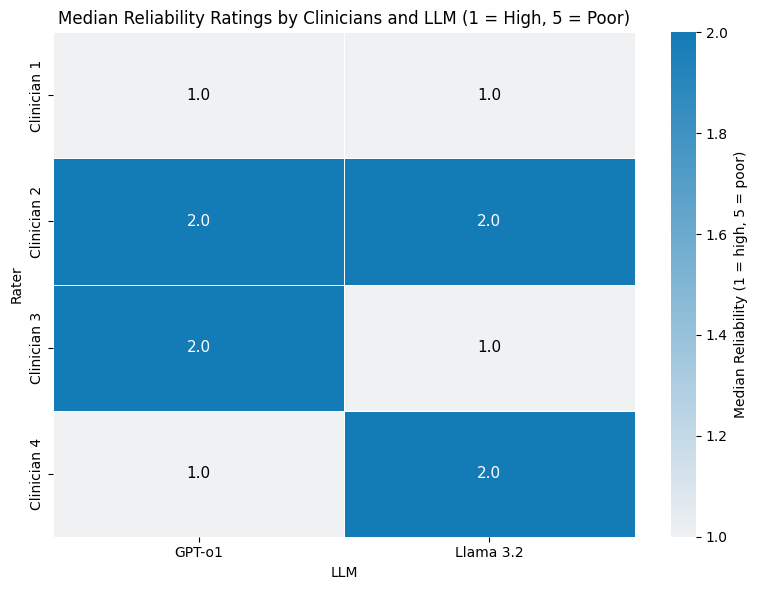

In [12]:
# Prepare data for consolidated heatmap: clinicians vs LLMs on Likert reliability (median per group)

# Extract relevant columns
reliability_cols = [col for col in df.columns if "Reliable_Reasoning" in col]
raters = ["Clinician 1", "Clinician 2", "Clinician 3", "Clinician 4"]
df_ratings = df[["LLM", "Rung"] + reliability_cols].copy()
df_ratings.columns = ["LLM", "Rung", *raters]

# Compute median reliability rating per Rater, LLM, and Rung
rating_long = df_ratings.melt(id_vars=["LLM", "Rung"], var_name="Rater", value_name="Score")
rating_summary = rating_long.groupby(["Rater", "LLM"]).agg(Median_Score=("Score", "median")).reset_index()

# Pivot for heatmap
agreement_matrix = rating_summary.pivot(index="Rater", columns="LLM", values="Median_Score")

# Plot using custom formatting
fig, ax = plt.subplots(figsize=(8, 6))
title = "Median Reliability Ratings by Clinicians and LLM (1 = High, 5 = Poor)"
cmap = sns.light_palette("#137BB6", as_cmap=True)

norm = plt.Normalize(vmin=np.nanmin(agreement_matrix.values), vmax=np.nanmax(agreement_matrix.values))
sns.heatmap(agreement_matrix, cmap=cmap, cbar=True, ax=ax, annot=False, fmt=".2f", linewidths=0.5, cbar_kws={"label": "Median Reliability (1 = high, 5 = poor)"})

# Add formatted annotations
for y in range(agreement_matrix.shape[0]):
    for x in range(agreement_matrix.shape[1]):
        val = agreement_matrix.iloc[y, x]
        if not np.isnan(val):
            color = "white" if norm(val) > 0.5 else "black"
            ax.text(x + 0.5, y + 0.5, f"{val:.1f}",
                    ha='center', va='center', color=color, fontsize=11)

ax.set_title(title)
ax.set_ylabel("Rater")
ax.set_xlabel("LLM")
plt.tight_layout()
plt.savefig("C:\\D\\e Health Lab projects\\Question_Answering\\LLM_Causality\\Clinican results\\Median Reliability Ratings by Clinicians and LLM (1 = High, 5 = Poor).png", dpi=300)
plt.show()


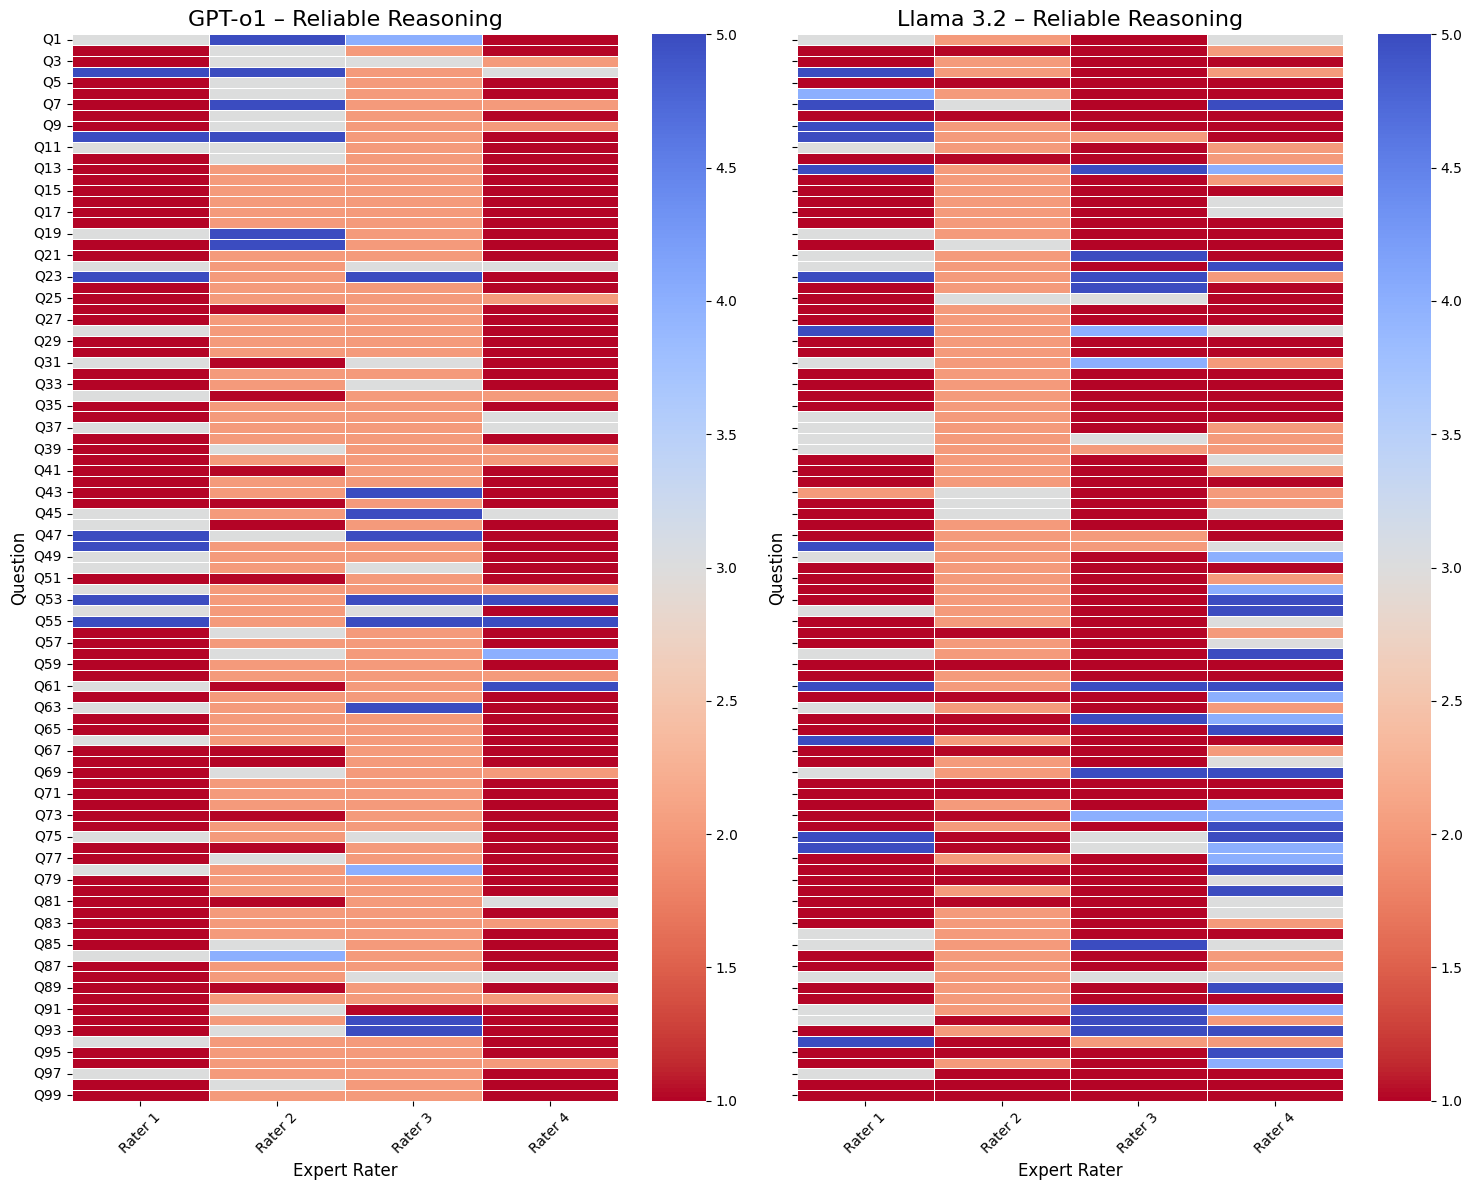

In [13]:
# Heatmap for Reliable Reasoning Scores with Q1–Q99 Y-axis Labels

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Excel file
file_path = 'C:\\D\\e Health Lab projects\\Question_Answering\\LLM_Causality\\Clinican results\\Causal IRR_R4.xlsx'
xls = pd.ExcelFile(file_path)
df = xls.parse('Sheet1')

# Define columns of interest for reliable reasoning scores
reliable_cols = [
    "Rater_1_Reliable_Reasoning_1_high_to_5_poor",
    "Rater_2_Reliable_Reasoning_1_high_to_5_poor",
    "Rater_3_Reliable_Reasoning_1_high_to_5_poor",
    "Rater_4_Reliable_Reasoning_1_high_to_5_poor"
]

# Assign Q1–Q99 separately for each LLM
df.loc[df["LLM"] == "GPT-o1", "Question"] = ["Q" + str(i + 1) for i in range(99)]
df.loc[df["LLM"] == "Llama 3.2", "Question"] = ["Q" + str(i + 1) for i in range(99)]

# Group data by LLM
llm_groups = df.groupby("LLM")

# Simplified column labels for expert raters
simplified_cols = ['Rater 1', 'Rater 2', 'Rater 3', 'Rater 4']

# Create subplots for each LLM
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 12), sharey=True)

# Reversed colormap: 1 = high quality (red), 5 = poor quality (blue)
cmap = sns.color_palette("coolwarm", as_cmap=True).reversed()

# Generate heatmaps
for ax, (llm_name, group) in zip(axes, llm_groups):
    heatmap_data = group[["Question"] + reliable_cols].set_index("Question")
    heatmap_data.columns = simplified_cols  # Rename for cleaner x-axis
    sns.heatmap(
        heatmap_data,
        ax=ax,
        cmap=cmap,
        vmin=1,
        vmax=5,
        linewidths=0.5,
        linecolor='white',
        cbar=True,
        annot=False
    )
    ax.set_title(f"{llm_name} – Reliable Reasoning", fontsize=16)
    ax.set_xlabel("Expert Rater", fontsize=12)
    ax.set_ylabel("Question", fontsize=12)
    ax.tick_params(axis='x', rotation=45)
    ax.tick_params(axis='y', rotation=0)

plt.tight_layout()
plt.savefig("C:\\D\\e Health Lab projects\\Question_Answering\\LLM_Causality\\Clinican results\\Reliable Reasoning.png", dpi=300)
plt.show()




C:\Users\bb23u\AppData\Local\Temp\ipykernel_8484\4221989758.py:22: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_binary[binary_cols] = df_binary[binary_cols].applymap(lambda x: 1 if str(x).strip().lower() == "yes" else 0)


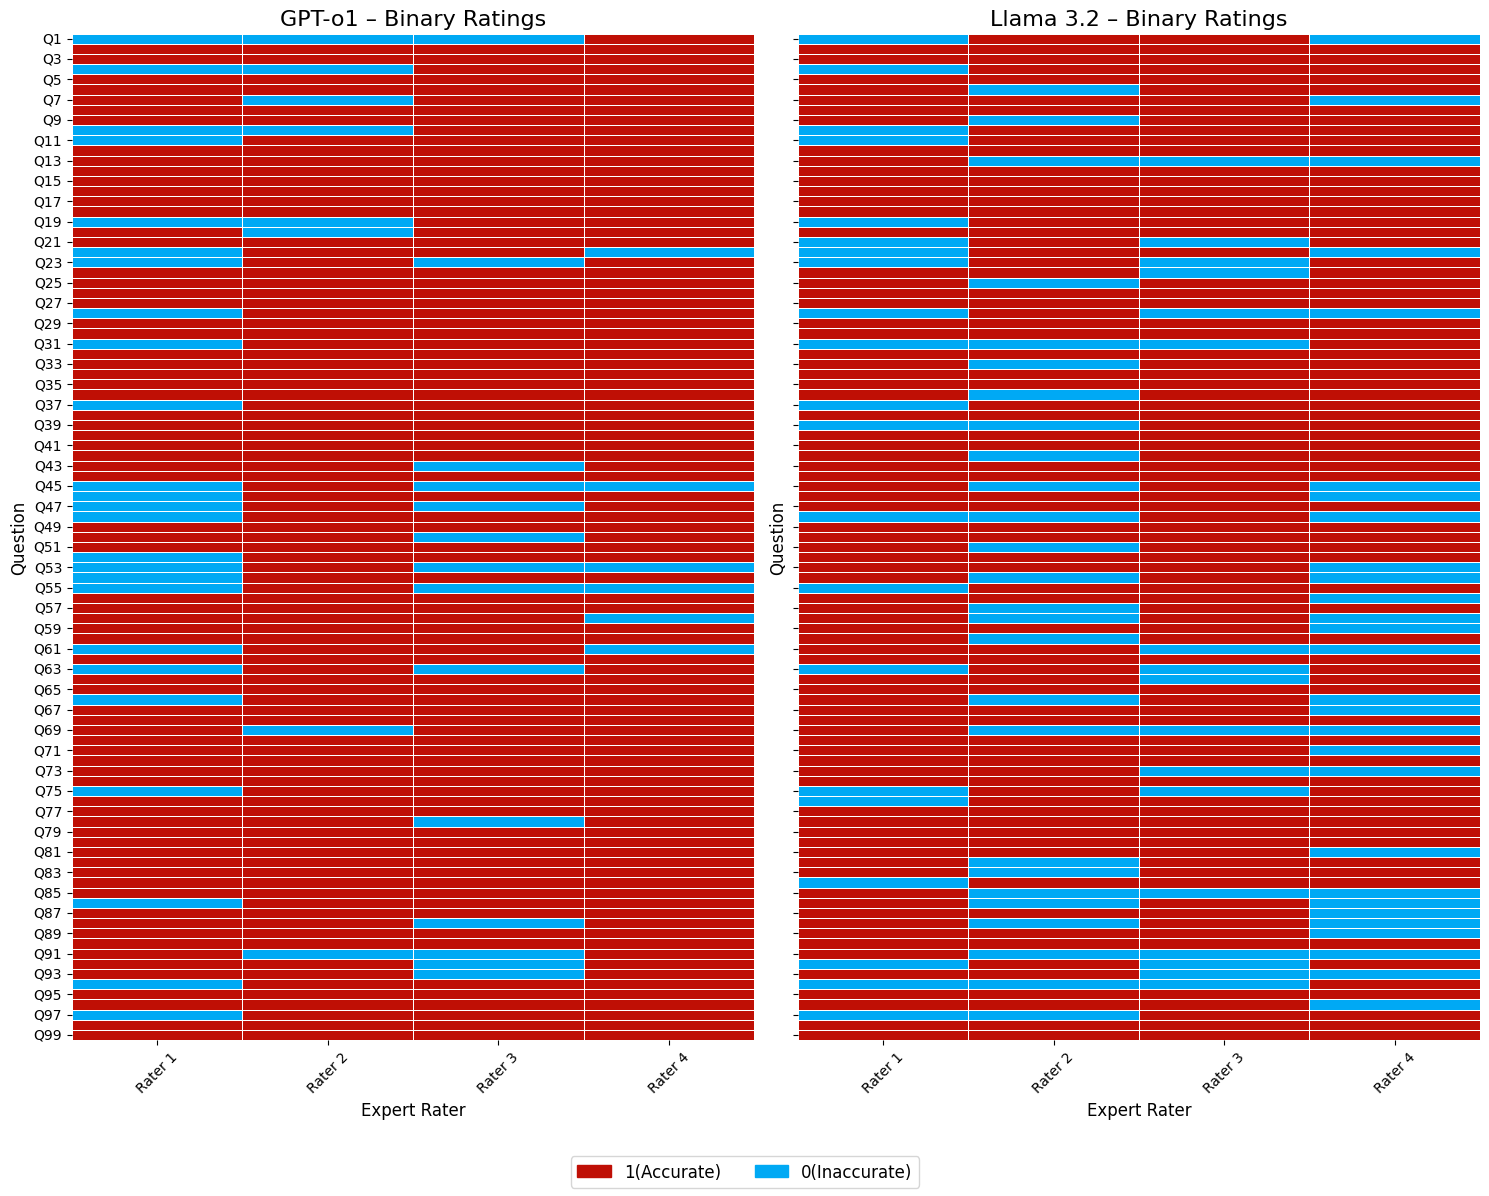

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

# Load the Excel file
file_path = 'C:\\D\\e Health Lab projects\\Question_Answering\\LLM_Causality\\Clinican results\\Causal IRR_R4.xlsx'
xls = pd.ExcelFile(file_path)
df = xls.parse('Sheet1')

# Binary columns to process
binary_cols = [
    "Rater_1_Accurate_Correct_Response_Yes_No",
    "Rater_2_Accurate_Correct_Response_Yes_No",
    "Rater_3_Accurate_Correct_Response_Yes_No",
    "Rater_4_Accurate_Correct_Response_Yes_No"
]

# Convert Yes/No to binary values (1 = Yes = Accurate, 0 = No = Inaccurate)
df_binary = df.copy()
df_binary[binary_cols] = df_binary[binary_cols].applymap(lambda x: 1 if str(x).strip().lower() == "yes" else 0)

# Assign Q1–Q99 separately for each LLM
df_binary.loc[df_binary["LLM"] == "GPT-o1", "Question"] = ["Q" + str(i + 1) for i in range(99)]
df_binary.loc[df_binary["LLM"] == "Llama 3.2", "Question"] = ["Q" + str(i + 1) for i in range(99)]

# Rename columns for cleaner x-axis labels
simplified_cols_binary = ['Rater 1', 'Rater 2', 'Rater 3', 'Rater 4']

# Group data by LLM
llm_groups_binary = df_binary.groupby("LLM")

# Define a discrete binary colormap: 0 = blue, 1 = red
binary_cmap = ListedColormap(["#00A9F4", "#BF0F05"])

# Create side-by-side heatmaps
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 12), sharey=True)

for ax, (llm_name, group) in zip(axes, llm_groups_binary):
    heatmap_data_binary = group[["Question"] + binary_cols].set_index("Question")
    heatmap_data_binary.columns = simplified_cols_binary
    sns.heatmap(
        heatmap_data_binary,
        ax=ax,
        cmap=binary_cmap,
        vmin=0,
        vmax=1,
        linewidths=0.5,
        linecolor='white',
        cbar=False,
        annot=False
    )
    ax.set_title(f"{llm_name} – Binary Ratings", fontsize=16)
    ax.set_xlabel("Expert Rater", fontsize=12)
    ax.set_ylabel("Question", fontsize=12)
    ax.tick_params(axis='x', rotation=45)
    ax.tick_params(axis='y', rotation=0)

# Add custom legend below the plots
red_patch = mpatches.Patch(color="#BF0F05", label="1(Accurate)")
blue_patch = mpatches.Patch(color="#00A9F4", label="0(Inaccurate)")
fig.legend(handles=[red_patch, blue_patch], loc='lower center', ncol=2, fontsize=12)

# Adjust layout to make space for legend
plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.savefig("C:\\D\\e Health Lab projects\\Question_Answering\\LLM_Causality\\Clinican results\\Binary Ratings.png", dpi=300)
plt.show()




In [22]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score, matthews_corrcoef, recall_score, confusion_matrix

# === 1. Load your data ===
file_path = 'C:\\D\\e Health Lab projects\\Question_Answering\\LLM_Causality\\Clinican results\\Causal IRR_R4.xlsx'
df = pd.read_excel(file_path)

# === 2. Identify your 5 rater columns ===
binary_cols = [f'Rater_{i}_Accurate_Correct_Response_Yes_No' for i in range(1, 5)]
likert_cols = [f'Rater_{i}_Reliable_Reasoning_1_high_to_4_poor' for i in range(1, 5)]

# === 3. Convert binary accuracy to 1/0 ===
df[binary_cols] = df[binary_cols].applymap(lambda x: 1 if x == 'Yes' else 0)

# === 4. Build majority‐vote ground truth and score ===
# y_true: 1 if ≥3 out of 5 raters said “Yes”
df['y_true']  = (df[binary_cols].sum(axis=1) >= 3).astype(int)
# y_score: proportion of raters saying “Yes” (for ROC)
df['y_score'] = df[binary_cols].sum(axis=1) / len(binary_cols)
df



C:\Users\bb23u\AppData\Local\Temp\ipykernel_30896\1265526131.py:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[binary_cols] = df[binary_cols].applymap(lambda x: 1 if x == 'Yes' else 0)


LLM                      Rung  \
0       GPT-o1               Association   
1       GPT-o1              Intervention   
2       GPT-o1  Counterfactual Reasoning   
3       GPT-o1               Association   
4       GPT-o1              Intervention   
..         ...                       ...   
193  Llama 3.2              Intervention   
194  Llama 3.2  Counterfactual Reasoning   
195  Llama 3.2               Association   
196  Llama 3.2              Intervention   
197  Llama 3.2  Counterfactual Reasoning   

     Rater_1_Accurate_Correct_Response_Yes_No  \
0                                           0   
1                                           1   
2                                           1   
3                                           0   
4                                           1   
..                                        ...   
193                                         1   
194                                         1   
195                                         0   
196                                         1   
197                                         1   

     Rater_2_Accurate_Correct_Response_Yes_No  \
0                                           0   
1                                           1   
2                                           1   
3                                           0   
4                                           1   
..                                        ...   
193                                         1   
194                                         1   
195                                         0   
196                                         1   
197                                         1   

     Rater_3_Accurate_Correct_Response_Yes_No  \
0                                           0   
1                                           1   
2                                           1   
3                                           1   
4                                           1   
..                                        ...   
193                                         1   
194                                         1   
195                                         1   
196                                         1   
197                                         1   

     Rater_4_Accurate_Correct_Response_Yes_No  \
0                                           1   
1                                           1   
2                                           1   
3                                           1   
4                                           1   
..                                        ...   
193                                         1   
194                                         0   
195                                         1   
196                                         1   
197                                         1   

     Rater_1_Reliable_Reasoning_1_high_to_5_poor  \
0                                              3   
1                                              1   
2                                              1   
3                                              5   
4                                              1   
..                                           ...   
193                                            1   
194                                            1   
195                                            3   
196                                            1   
197                                            1   

     Rater_2_Reliable_Reasoning_1_high_to_5_poor  \
0                                              5   
1                                              3   
2                                              3   
3                                              5   
4                                              3   
..                                           ...   
193                                            1   
194                                            2   
195                              

In [23]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score, matthews_corrcoef, recall_score, confusion_matrix


# === 1. Load the Excel file ===
file_path = 'C:\\D\\e Health Lab projects\\Question_Answering\\LLM_Causality\\Clinican results\\Causal IRR_R4.xlsx'
df = pd.read_excel(file_path)

# === 2. Identify your 5 rater columns ===
binary_cols = [f'Rater_{i}_Accurate_Correct_Response_Yes_No' for i in range(1, 5)]

# === 3. Convert binary accuracy to 1/0 ===
df[binary_cols] = df[binary_cols].applymap(lambda x: 1 if x == 'Yes' else 0)

# === 4. Build majority‐vote ground truth and score ===
df['y_true'] = (df[binary_cols].sum(axis=1) >= 3).astype(int)
df['y_score'] = df[binary_cols].sum(axis=1) / len(binary_cols)

# === 5. Compute means and standard deviations of y_true and y_pred per LLM and Rung ===
group_stats = df.groupby(['LLM', 'Rung']).agg(
    y_true_mean=('y_true', 'mean'),
    y_true_std=('y_true', 'std'),
    y_score_mean=('y_score', 'mean'),
    y_score_std=('y_score', 'std')
).reset_index()
group_stats



C:\Users\bb23u\AppData\Local\Temp\ipykernel_30896\2520320504.py:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[binary_cols] = df[binary_cols].applymap(lambda x: 1 if x == 'Yes' else 0)


LLM                      Rung  y_true_mean  y_true_std  y_score_mean  \
0     GPT-o1               Association     0.757576    0.435194      0.780303   
1     GPT-o1  Counterfactual Reasoning     0.939394    0.242306      0.909091   
2     GPT-o1              Intervention     0.909091    0.291937      0.909091   
3  Llama 3.2               Association     0.606061    0.496198      0.666667   
4  Llama 3.2  Counterfactual Reasoning     0.696970    0.466694      0.734848   
5  Llama 3.2              Intervention     0.909091    0.291937      0.901515   

   y_score_std  
0     0.231820  
1     0.174756  
2     0.185596  
3     0.262698  
4     0.224821  
5     0.164642

In [24]:
# === 6. Define metric functions correctly ===
def specificity_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn + fp) if (tn + fp) != 0 else np.nan

metric_funcs = {
    'Area under the receiver operating characteristic': lambda y_true, y_score, y_pred: roc_auc_score(y_true, y_pred),
    'Phi coefficient': lambda y_true, y_score, y_pred: matthews_corrcoef(y_true, y_pred),
    'Sensitivity': lambda y_true, y_score, y_pred: recall_score(y_true, y_pred, zero_division=0),
    'Specificity': specificity_score
}

# === 7. Compute and display performance metrics per LLM and Rung ===
results = []
for (llm, rung), grp in df.groupby(['LLM', 'Rung']):
    row = {'LLM': llm, 'Rung': rung}
    y_true = grp['y_true']
    y_score = grp['y_score']
    y_pred = (y_score >= 0.80).astype(int)

    for metric_name, func in metric_funcs.items():
        try:
            row[metric_name] = func(y_true, y_score, y_pred)
        except Exception:
            row[metric_name] = np.nan
    results.append(row)

metrics_df = pd.DataFrame(results)
metrics_df 

LLM                      Rung  \
0     GPT-o1               Association   
1     GPT-o1  Counterfactual Reasoning   
2     GPT-o1              Intervention   
3  Llama 3.2               Association   
4  Llama 3.2  Counterfactual Reasoning   
5  Llama 3.2              Intervention   

   Area under the receiver operating characteristic  Phi coefficient  \
0                                          0.780000         0.485582   
1                                          0.887097         0.414781   
2                                          0.916667         0.559017   
3                                          0.700000         0.456070   
4                                          0.717391         0.434783   
5                                          0.883333         0.479583   

   Sensitivity  Specificity  
0     0.560000          NaN  
1     0.774194          NaN  
2     0.833333          NaN  
3     0.400000          NaN  
4     0.434783          NaN  
5     0.766667          NaN

In [21]:
df=pd.read_excel("C:\\D\\e Health Lab projects\\Question_Answering\\LLM_Causality\\Clinican results\\Causal IRR_R4.xlsx")
df

Lab Test               Causal Type  \
0           Hemoglobin A1c (HbA1c)               Association   
1           Hemoglobin A1c (HbA1c)              Intervention   
2           Hemoglobin A1c (HbA1c)  Counterfactual Reasoning   
3           Hemoglobin A1c (HbA1c)               Association   
4           Hemoglobin A1c (HbA1c)              Intervention   
..                             ...                       ...   
193       C-Reactive Protein (CRP)              Intervention   
194       C-Reactive Protein (CRP)  Counterfactual Reasoning   
195  Low-Density Lipoprotein (LDL)               Association   
196  Low-Density Lipoprotein (LDL)              Intervention   
197  Low-Density Lipoprotein (LDL)  Counterfactual Reasoning   

                                              Question Causal factors  \
0    Does a 68-year-old female a smoker with Hemogl...        smoking   
1    If a 61-year-old female patient with Hemoglobi...        smoking   
2    If this patient had never been a smoker, would...        smoking   
3    Does a 73-year-old male a smoker with Hemoglob...   age, smoking   
4    If a 63-year-old male patient with Hemoglobin ...   age, smoking   
..                                                 ...            ...   
193  If a 51-year-old male patient with C-Reactive ...        smoking   
194  If this patient had never been a smoker, would...        smoking   
195  Does a 53-year-old female a smoker with Low-De...        smoking   
196  If a 53-year-old male patient with Low-Density...        smoking   
197  If this patient had never been a smoker, would...        smoking   

            Response                                          Reasoning  \
0          Increased  Smoking is a well-established risk factor for ...   
1          Decreased  Smoking cessation can improve insulin sensitiv...   
2    Altered outcome  Smoking is a known risk factor for insulin res...   
3                 No  Age and smoking are risk factors for elevated ...   
4          Decreased  Quitting smoking is associated with improved i...   
..               ...                                                ...   
193         Decrease  Quitting smoking can lead to reduced inflammat...   
194               No  Smoking is a significant risk factor for incre...   
195              Yes  Smoking is associated with increased cardiovas...   
196         Decrease  Quitting smoking can lead to reduced cardiovas...   
197               No  Smoking is a significant risk factor for eleva...   

           LLM                      Rung  \
0       GPT-o1               Association   
1       GPT-o1              Intervention   
2       GPT-o1  Counterfactual Reasoning   
3       GPT-o1               Association   
4       GPT-o1              Intervention   
..         ...                       ...   
193  Llama 3.2              Intervention   
194  Llama 3.2  Counterfactual Reasoning   
195  Llama 3.2               Association   
196  Llama 3.2              Intervention   
197  Llama 3.2  Counterfactual Reasoning   

    Rater_1_Accurate_Correct_Response_Yes_No  \
0                                         No   
1                                        Yes   
2                                        Yes   
3                                         No   
4                                        Yes   
..                                       ...   
193                                      Yes   
194                                      Yes   
195                                       No   
196                                      Yes   
197                                      Yes   

    Rater_2_Accurate_Correct_Response_Yes_No  \
0                                         No   
1                                        Yes   
2                                        Yes   
3                                         No   
4                                        Yes   
..                                       ...   
193                                  

In [23]:
# Replace "Counterfactual Reasoning" with "Counterfactual" in the 'Causal Type' column
df["Causal Type"] = df["Causal Type"].replace("Counterfactual Reasoning", "Counterfactual")
df["Rung"] = df["Rung"].replace("Counterfactual Reasoning", "Counterfactual")
df.to_excel("C:\\D\\e Health Lab projects\\Question_Answering\\LLM_Causality\\Clinican results\\Causal IRR_R4.xlsx")